In [1]:
import SimpleITK as sitk
import pydicom
import dicom2nifti
import numpy as np
#import math
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import matplotlib.image as mpimg
import os, sys, time
import natsort
import dicom_functions
import explore_dicom_data
from myshow import myshow

# Trying out HelloWorld example here:

### https://simpleelastix.readthedocs.io/HelloWorld.html

# Using procedural interface:

In [3]:
# Using procedural interface:

img1_name = 'BrainProtonDensity.png'
img2_name = 'BrainProtonDensityTranslated13x17y.png'


resultImage = sitk.Elastix(sitk.ReadImage(img1_name), \
                           sitk.ReadImage(img2_name), \
                           "translation")


# Using object-oriented interface:

In [ ]:
# Using object-oriented interface:

fixedImage = sitk.ReadImage(img1_name)
movingImage = sitk.ReadImage(img2_name)
parameterMap = sitk.GetDefaultParameterMap('translation')

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.SetParameterMap(parameterMap)
elastixImageFilter.Execute()

resultImage = elastixImageFilter.GetResultImage()
transformParameterMap = elastixImageFilter.GetTransformParameterMap()

In [17]:
# Define directories of DICOM files and location to store NIfTI files:
dicomDir = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff\data\dicom'

niftiDir = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff\data\nifti'

#dicom2nifti.settings.disable_validate_orthogonal()
#dicom2nifti.settings.enable_resampling()
#dicom2nifti.settings.set_resample_spline_interpolation_order(1)
#dicom2nifti.settings.set_resample_padding(-1000)

# Convert DICOM to NIfTI:
dicom2nifti.convert_directory(dicomDir, niftiDir)

At least 4 slices are needed for correct conversion
---------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\ctorti\Anaconda37\lib\site-packages\dicom2nifti\convert_dir.py", line 87, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "C:\Users\ctorti\Anaconda37\lib\site-packages\dicom2nifti\convert_dicom.py", line 118, in dicom_array_to_nifti
    results = convert_generic.dicom_to_nifti(dicom_list, output_file)
  File "C:\Users\ctorti\Anaconda37\lib\site-packages\dicom2nifti\convert_generic.py", line 43, in dicom_to_nifti
    common.validate_slicecount(dicom_input)
  File "C:\Users\ctorti\Anaconda37\lib\site-packages\dicom2nifti\common.py", line 685, in validate_slicecount
    raise ConversionValidationError('TOO_FEW_SLICES/LOCALIZER')
dicom2nifti.exceptions.ConversionValidationError: TOO_FEW_SLICES/LOCALIZER
At least 4 slices are needed for correct conversion
-----------------------

In [18]:
# Try something else:

dicomFname = 'image-000115.dcm'
dicomFpath = os.path.join(dicomDir, dicomFname)
niftiFname = os.path.split(dicomFname)[1] + '.nii'
niftiFpath = os.path.join(dicomDir, niftiFname)

dicom2nifti.convert_dicom.dicom_array_to_nifti(dicomFpath, niftiFpath, reorient_nifti=True) 

TypeError: 'in <string>' requires string as left operand, not BaseTag

# Try using nibabel:

In [20]:
import nibabel

In [ ]:
# Can't find any usage examples of converting dicom to nifti using nibabel...

# See if I can load dicom images directly using SimpleITK...

### https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks/blob/master/Python/03_Image_Details.ipynb

# NOTE: sitk.ReadImage() interprets a DICOM slice as a 3D image with dimensions (N,N,1).  In order to perform registrations the 3D image needs to be converted to 2D, or Shrinking Image Pyramid must be used.  

### https://github.com/SuperElastix/SimpleElastix/issues/10

In [3]:
dicomDir = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff\data\dicom'

fixedFname = 'image-000040.dcm'
movingFname = 'image-000115.dcm' 
#movingFname = 'image-000116.dcm'

fixedFpath = os.path.join(dicomDir, fixedFname)
movingFpath = os.path.join(dicomDir, movingFname)

fixed3D = sitk.ReadImage(fixedFpath)
moving3D = sitk.ReadImage(movingFpath)

# Extract the 2D images from the 3D fixed images:
fixed2D = sitk.Extract(fixed3D, (fixed3D.GetWidth(), fixed3D.GetHeight(), 0), (0, 0, 0))
moving2D = sitk.Extract(moving3D, (moving3D.GetWidth(), moving3D.GetHeight(), 0), (0, 0, 0))

# Convert from SimpleITK image data type to numpy data array:
fixed2Dnda = sitk.GetArrayFromImage(fixed2D)
moving2Dnda = sitk.GetArrayFromImage(moving2D)

if 0:
    print('Image dtype                                :', image1.GetPixelIDTypeAsString())
    print("Image PixelType                            : {0}".format(sitk.GetPixelIDValueAsString(image1.GetPixelID())))
    print("Image PixelID                              : {0}".format(image1.GetPixelID()))
    print("Image Shape (SimpleITK)                    : {0}".format(image1.GetSize()));
    print('Image shape (SimpleITK to numpy data array): {0}'.format(np.shape(image1nda)));
    print("Image Width                                : {0}".format(image1.GetWidth()))
    print("Image Height                               : {0}".format(image1.GetHeight()))
    print("Image Depth                                : {0}".format(image1.GetDepth()))
    print("Image Dimension                            : {0}".format(image1.GetDimension()))
    print("Image Origin                               : {0}".format(image1.GetOrigin()))
    print("Image Spacing                              : {0}".format(image1.GetSpacing()))
    print("Image Direction                            : {0}".format(image1.GetDirection()))
    print('Number of channels                         : {0}'.format(image1.GetNumberOfComponentsPerPixel()))
    print('Image Modality                             : {0}'.format(image1.GetMetaData('0008|0060')))
    print('Photometric interpretation                 : {0}'.format(image1.GetMetaData('0028|0004')))

print('Parameter                        fixed                        moving')
print("\nImage PixelType (2D)             {0}        {1}".format(sitk.GetPixelIDValueAsString(fixed2D.GetPixelID()),\
                                                                 sitk.GetPixelIDValueAsString(moving2D.GetPixelID())))
print("Image PixelID (2D)               {0}                            {1}".format(fixed2D.GetPixelID(), moving2D.GetPixelID()))
print("Image Shape (2D)                 {0}                   {1}".format(fixed2D.GetSize(), moving2D.GetSize()));
print("Image Shape (2D nda)             {0}                   {1}".format(np.shape(fixed2Dnda), np.shape(moving2Dnda)));
print("Image Origin (2D)                {0}             {1}".format(fixed2D.GetOrigin(), moving2D.GetOrigin()))
print("Image Spacing (2D)               {0}         {1}".format(fixed2D.GetSpacing(), moving2D.GetSpacing()))
print("Image Direction (2D)             {0}         {1}".format(fixed2D.GetDirection(), moving2D.GetDirection()))
print('Number of channels (2D)          {0}                            {1}'.format(fixed2D.GetNumberOfComponentsPerPixel(),\
                                                                                   moving2D.GetNumberOfComponentsPerPixel()))
print('Image Modality (3D)              {0}                           {1}'.format(fixed3D.GetMetaData('0008|0060'),\
                                                                                  moving3D.GetMetaData('0008|0060')))
print('Photometric interpretation (3d)  {0}                 {1}'.format(fixed3D.GetMetaData('0028|0004'),\
                                                                        moving3D.GetMetaData('0028|0004')))

Parameter                        fixed                        moving

Image PixelType (2D)             64-bit float        32-bit signed integer
Image PixelID (2D)               9                            4
Image Shape (2D)                 (256, 256)                   (512, 512)
Image Shape (2D nda)             (256, 256)                   (512, 512)
Image Origin (2D)                (-124.51171875, -124.51171875)             (-127.5, -127.5)
Image Spacing (2D)               (0.9765625, 0.9765625)         (0.498047, 0.498047)
Image Direction (2D)             (1.0, 0.0, 0.0, 1.0)         (1.0, 0.0, 0.0, 1.0)
Number of channels (2D)          1                            1
Image Modality (3D)              PT                           CT
Photometric interpretation (3d)  MONOCHROME2                  MONOCHROME2 


In [80]:
for key in image1.GetMetaDataKeys():
    print("\"{0}\":\"{1}\"".format(key, image1.GetMetaData(key)))

"0008|0005":"ISO_IR 100"
"0008|0008":"ORIGINAL\PRIMARY\AXIAL"
"0008|0012":"20150430"
"0008|0013":"093411"
"0008|0016":"1.2.840.10008.5.1.4.1.1.2"
"0008|0018":"1.2.826.0.1.3680043.8.1055.1.20170626100149065.206706972.6067386"
"0008|0020":"20150430"
"0008|0021":"20150430"
"0008|0022":"20150430"
"0008|0023":"20150430"
"0008|0030":"092753"
"0008|0031":"093222"
"0008|0032":"093240"
"0008|0033":"093411"
"0008|0050":""
"0008|0060":"CT"
"0008|0070":"GE MEDICAL SYSTEMS"
"0008|0080":""
"0008|0090":""
"0008|1010":""
"0008|1030":"NEURO "
"0008|103e":"Standard 1.25 "
"0008|1060":""
"0008|1070":""
"0008|1090":"Discovery STE "
"0010|0010":"Anonymized^^"
"0010|0020":"0 "
"0010|0030":""
"0010|0040":"M "
"0010|1010":"045Y"
"0010|1020":"1.60"
"0010|1030":"73.0"
"0010|21b0":""
"0018|0022":"HELICAL MODE"
"0018|0050":"1.250000"
"0018|0060":"140 "
"0018|0090":"500.000000"
"0018|1020":"dm09_dvctsp1.23 "
"0018|1030":"1.5 SMEGENYS DEMENCIJA 2D "
"0018|1100":"255.000000"
"0018|1110":"949.075012"
"0018|1111":"541

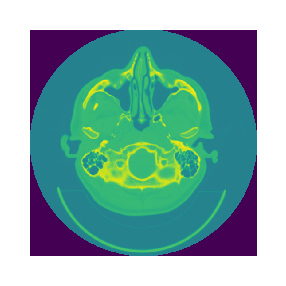

In [86]:
plt.figure(figsize=(1, 1), dpi=300);
plt.imshow(image1nda[0]);
plt.axis('off');

In [81]:
sitk.Show(image1)

RuntimeError: Exception thrown in SimpleITK Show: C:\SimpleElastix\source\SimpleElastix\Code\IO\src\sitkShow.cxx:495:
sitk::ERROR: No appropriate executable found.

In [25]:
reader = sitk.ImageSeriesReader()
dicomFnames = reader.GetGDCMSeriesFileNames(dicomDir)
dicomFnames

('C:\\Users\\ctorti\\Documents\\GitHub\\WP1.3_multiple_modalities\\trying stuff\\data\\dicom/image-000041.dcm',
 'C:\\Users\\ctorti\\Documents\\GitHub\\WP1.3_multiple_modalities\\trying stuff\\data\\dicom/image-000040.dcm')

# For some reason the above command has missed out on "image-000115.dcm" and 'image-000116.dcm'... (?)

In [26]:
reader.SetFileNames(dicomFnames)
reader.GetMetaData(0, '0010|0010')

RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_GetMetaData: bad function call

In [27]:
reader.SetFileNames(dicomFnames[0])
reader.GetMetaData(0, '0010|0010')

RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_GetMetaData: bad function call

In [32]:
sys.argv

['C:\\Users\\ctorti\\Anaconda37\\lib\\site-packages\\ipykernel_launcher.py',
 '-f',
 'C:\\Users\\ctorti\\AppData\\Roaming\\jupyter\\runtime\\kernel-6a5ebc88-9969-4658-b6d1-eb4014fbc818.json']

In [35]:
reader = sitk.ImageSeriesReader()
dicomFnames = reader.GetGDCMSeriesFileNames(dicomDir)
reader.SetFileNames(dicomFnames)

image = reader.Execute()

size = image.GetSize()
print( "Image size:", size[0], size[1], size[2] )

#print( "Writing image:", sys.argv[2] )

#sitk.WriteImage( image, sys.argv[2] )

#if ( not "SITK_NOSHOW" in os.environ ):
#    sitk.Show( image, "Dicom Series" )

sitk.Show( image, "Dicom Series" )

Image size: 256 256 2


RuntimeError: Exception thrown in SimpleITK Show: C:\SimpleElastix\source\SimpleElastix\Code\IO\src\sitkShow.cxx:495:
sitk::ERROR: No appropriate executable found.

# Load the DICOMs:

In [3]:
dicomDir = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff\data\dicom'

fixedFname = 'image-000040.dcm'
movingFname = 'image-000115.dcm' 
#movingFname = 'image-000116.dcm'

fixedFpath = os.path.join(dicomDir, fixedFname)
movingFpath = os.path.join(dicomDir, movingFname)

fixed3D = sitk.ReadImage(fixedFpath)
moving3D = sitk.ReadImage(movingFpath)

# Extract the 2D images from the 3D fixed images:
fixed2D = sitk.Extract(fixed3D, (fixed3D.GetWidth(), fixed3D.GetHeight(), 0), (0, 0, 0))
moving2D = sitk.Extract(moving3D, (moving3D.GetWidth(), moving3D.GetHeight(), 0), (0, 0, 0))

# Convert from SimpleITK image data type to numpy data array:
fixed2Dnda = sitk.GetArrayFromImage(fixed2D)
moving2Dnda = sitk.GetArrayFromImage(moving2D)

if 0:
    print('Image dtype                                :', image1.GetPixelIDTypeAsString())
    print("Image PixelType                            : {0}".format(sitk.GetPixelIDValueAsString(image1.GetPixelID())))
    print("Image PixelID                              : {0}".format(image1.GetPixelID()))
    print("Image Shape (SimpleITK)                    : {0}".format(image1.GetSize()));
    print('Image shape (SimpleITK to numpy data array): {0}'.format(np.shape(image1nda)));
    print("Image Width                                : {0}".format(image1.GetWidth()))
    print("Image Height                               : {0}".format(image1.GetHeight()))
    print("Image Depth                                : {0}".format(image1.GetDepth()))
    print("Image Dimension                            : {0}".format(image1.GetDimension()))
    print("Image Origin                               : {0}".format(image1.GetOrigin()))
    print("Image Spacing                              : {0}".format(image1.GetSpacing()))
    print("Image Direction                            : {0}".format(image1.GetDirection()))
    print('Number of channels                         : {0}'.format(image1.GetNumberOfComponentsPerPixel()))
    print('Image Modality                             : {0}'.format(image1.GetMetaData('0008|0060')))
    print('Photometric interpretation                 : {0}'.format(image1.GetMetaData('0028|0004')))

print('Parameter                        fixed                        moving')
print("\nImage PixelType (2D)             {0}        {1}".format(sitk.GetPixelIDValueAsString(fixed2D.GetPixelID()),\
                                                                 sitk.GetPixelIDValueAsString(moving2D.GetPixelID())))
print("Image PixelID (2D)               {0}                            {1}".format(fixed2D.GetPixelID(), moving2D.GetPixelID()))
print("Image Shape (2D)                 {0}                   {1}".format(fixed2D.GetSize(), moving2D.GetSize()));
print("Image Shape (2D nda)             {0}                   {1}".format(np.shape(fixed2Dnda), np.shape(moving2Dnda)));
print("Image Origin (2D)                {0}             {1}".format(fixed2D.GetOrigin(), moving2D.GetOrigin()))
print("Image Spacing (2D)               {0}         {1}".format(fixed2D.GetSpacing(), moving2D.GetSpacing()))
print("Image Direction (2D)             {0}         {1}".format(fixed2D.GetDirection(), moving2D.GetDirection()))
print('Number of channels (2D)          {0}                            {1}'.format(fixed2D.GetNumberOfComponentsPerPixel(),\
                                                                                   moving2D.GetNumberOfComponentsPerPixel()))
print('Image Modality (3D)              {0}                           {1}'.format(fixed3D.GetMetaData('0008|0060'),\
                                                                                  moving3D.GetMetaData('0008|0060')))
print('Photometric interpretation (3d)  {0}                 {1}'.format(fixed3D.GetMetaData('0028|0004'),\
                                                                        moving3D.GetMetaData('0028|0004')))

Parameter                        fixed                        moving

Image PixelType (2D)             64-bit float        32-bit signed integer
Image PixelID (2D)               9                            4
Image Shape (2D)                 (256, 256)                   (512, 512)
Image Shape (2D nda)             (256, 256)                   (512, 512)
Image Origin (2D)                (-124.51171875, -124.51171875)             (-127.5, -127.5)
Image Spacing (2D)               (0.9765625, 0.9765625)         (0.498047, 0.498047)
Image Direction (2D)             (1.0, 0.0, 0.0, 1.0)         (1.0, 0.0, 0.0, 1.0)
Number of channels (2D)          1                            1
Image Modality (3D)              PT                           CT
Photometric interpretation (3d)  MONOCHROME2                  MONOCHROME2 


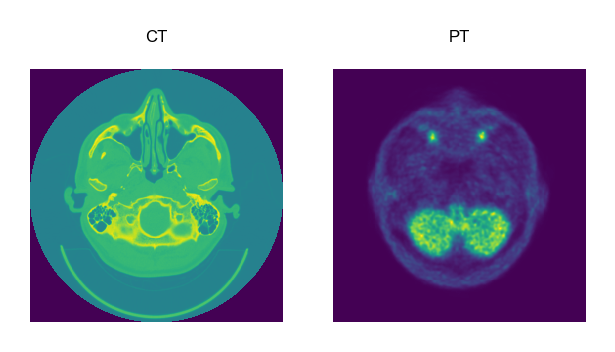

In [90]:
# Set the number of subplot columns:
cols = 4

plt.figure(figsize=(5, 5), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(image1nda[0]);
plt.title(image1.GetMetaData('0008|0060'), **title_font);
plt.axis('off');

# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(image2nda[0]);
plt.title(image2.GetMetaData('0008|0060'), **title_font);
plt.axis('off');

# Try Rigid registration:

### https://simpleelastix.readthedocs.io/RigidRegistration.html

In [4]:
start_time = time.time()
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixed2D)
elastixImageFilter.SetMovingImage(moving2D)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("rigid"))
resultRigid = elastixImageFilter.Execute()
#sitk.WriteImage(elastixImageFilter.GetResultImage())
end_time = time.time()
print('Registration took %s seconds' %(end_time - start_time)) # 5.6 s

Registration took 5.585180044174194 seconds


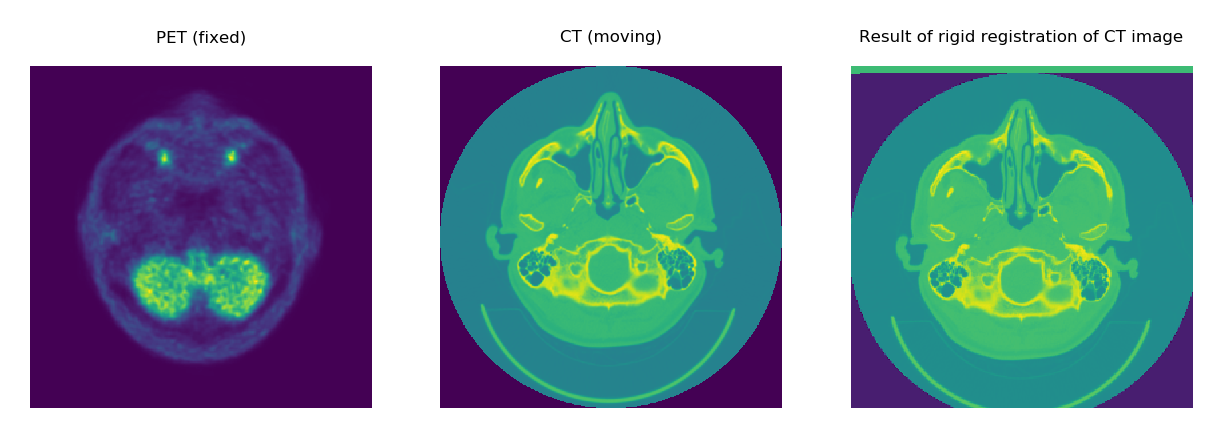

In [22]:
# Set the number of subplot columns:
cols=3
# Set the title font:
fontSize=4

plt.figure(figsize=(5, 5), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image1nda[0]);
plt.imshow(sitk.GetArrayFromImage(fixed2D));
plt.title('PET (fixed)', size=fontSize);
plt.axis('off');

# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image2nda[0]);
plt.imshow(sitk.GetArrayFromImage(moving2D));
plt.title('CT (moving)', size=fontSize);
plt.axis('off');

# Col 3:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image2nda[0]);
plt.imshow(sitk.GetArrayFromImage(resultRigid));
plt.title('Result of rigid registration of CT image', size=fontSize);
plt.axis('off');

#plt.savefig('Rigid reg of CT to PET using SimpleITK.jpg', bbox_inches='tight')

# Try Affine registration:

### https://simpleelastix.readthedocs.io/AffineRegistration.html

In [6]:
start_time = time.time()
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixed2D)
elastixImageFilter.SetMovingImage(moving2D)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("affine"))
resultAffine = elastixImageFilter.Execute()
#sitk.WriteImage(elastixImageFilter.GetResultImage())
end_time = time.time()
print('Registration took {}s seconds'.format(end_time - start_time)) # 5.7 s

Registration took 5.711421728134155s seconds


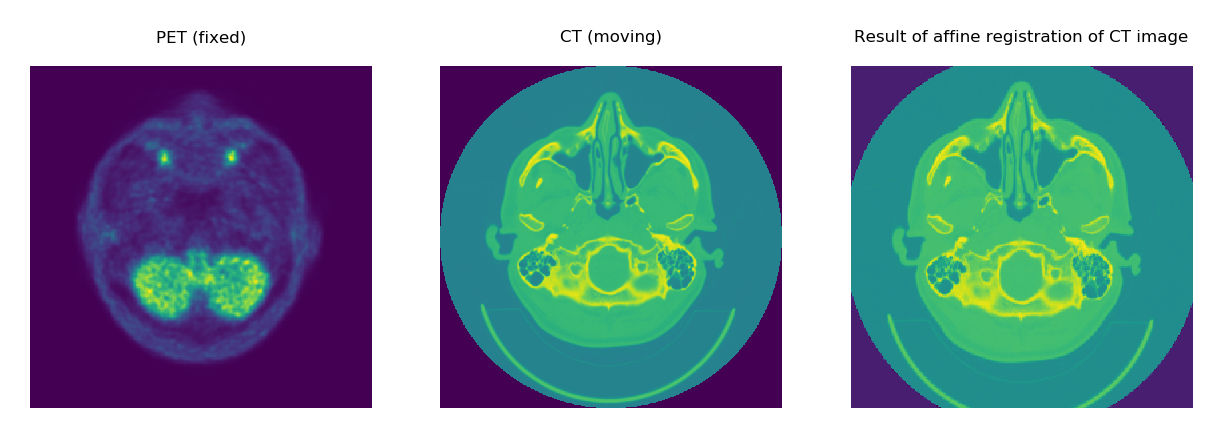

In [23]:
# Set the number of subplot columns:
cols=3
# Set the title font:
fontSize=4

plt.figure(figsize=(5, 5), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image1nda[0]);
plt.imshow(sitk.GetArrayFromImage(fixed2D));
plt.title('PET (fixed)', size=fontSize);
plt.axis('off');

# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image2nda[0]);
plt.imshow(sitk.GetArrayFromImage(moving2D));
plt.title('CT (moving)', size=fontSize);
plt.axis('off');

# Col 3:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image2nda[0]);
plt.imshow(sitk.GetArrayFromImage(resultAffine));
plt.title('Result of affine registration of CT image', size=fontSize);
plt.axis('off');

plt.savefig('Affine reg of CT to PET using SimpleITK.jpg', bbox_inches='tight')

# Compare result of rigid and affine registrations (they should be the same):

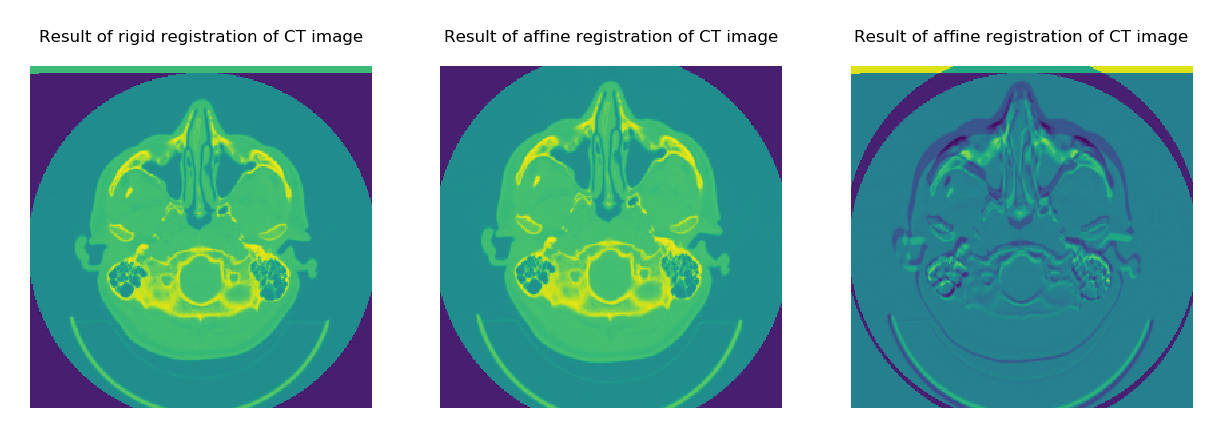

In [25]:
# Set the number of subplot columns:
cols=3
# Set the title font:
fontSize=4

plt.figure(figsize=(5, 5), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image1nda[0]);
plt.imshow(sitk.GetArrayFromImage(resultRigid));
plt.title('Result of rigid registration of CT image', size=fontSize);
plt.axis('off');

# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image2nda[0]);
plt.imshow(sitk.GetArrayFromImage(resultAffine));
plt.title('Result of affine registration of CT image', size=fontSize);
plt.axis('off');

# Col 3:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image2nda[0]);
plt.imshow(sitk.GetArrayFromImage(resultRigid) - sitk.GetArrayFromImage(resultAffine));
plt.title('Result of affine registration of CT image', size=fontSize);
plt.axis('off');

plt.savefig('Diff bt Rigid and Affine reg of CT to PET using SimpleITK.jpg', bbox_inches='tight')

# Try non-rigid registration:

### https://github.com/SuperElastix/SimpleElastix/issues/132

In [7]:
start_time = time.time()
resultElastix = sitk.Elastix(fixed2D, moving2D)
#resultElastix = sitk.Elastix(fixed2D, moving2D, True)
end_time = time.time()
print('Registration took {}s seconds'.format(end_time - start_time)) # 129.5 s = 2.16 min

Registration took 129.54110455513s seconds


# NOTE:  
## sitk.Elastix() took (> 2 min) considerably longer to execute than elastixImageFilter.Execute() using rigid or affine transformations (< 6 s).

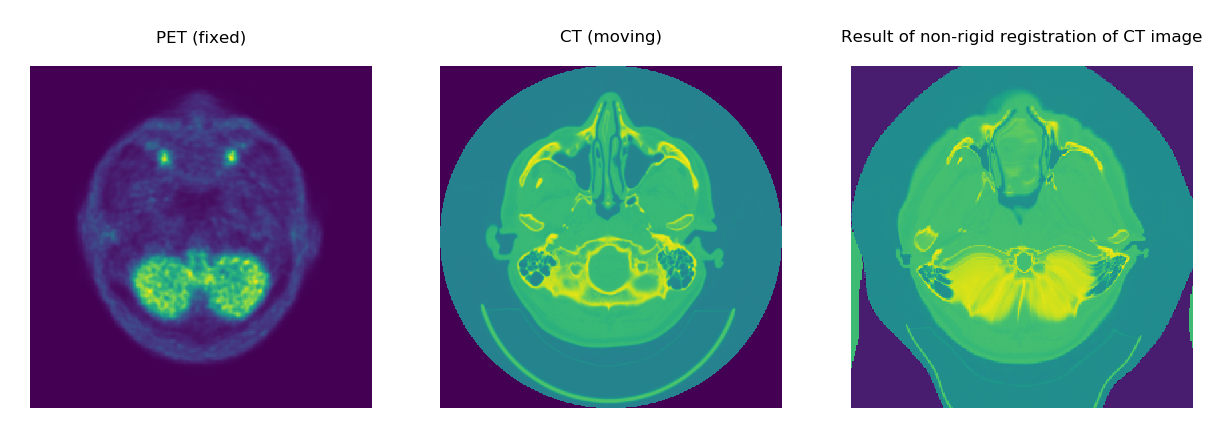

In [27]:
# Set the number of subplot columns:
cols=3
# Set the title font:
fontSize=4

plt.figure(figsize=(5, 5), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image1nda[0]);
plt.imshow(sitk.GetArrayFromImage(fixed2D));
plt.title('PET (fixed)', size=fontSize);
plt.axis('off');

# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image2nda[0]);
plt.imshow(sitk.GetArrayFromImage(moving2D));
plt.title('CT (moving)', size=fontSize);
plt.axis('off');

# Col 3:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image2nda[0]);
plt.imshow(sitk.GetArrayFromImage(resultElastix));
plt.title('Result of non-rigid registration of CT image', size=fontSize);
plt.axis('off');

plt.savefig('Non-rigid reg of CT to PET using SimpleITK.jpg', bbox_inches='tight')

# Try to load dicom series rather than single scans:

### https://simpleitk.readthedocs.io/en/master/link_DicomSeriesReader_docs.html

In [10]:
sys.argv

['C:\\Users\\ctorti\\Anaconda37\\lib\\site-packages\\ipykernel_launcher.py',
 '-f',
 'C:\\Users\\ctorti\\AppData\\Roaming\\jupyter\\runtime\\kernel-815ef57f-be97-4127-b61c-7d96a7c8bb45.json']

In [46]:
dicomDir = r'C:\Data\Softneta data\2015-04-30 Neuro'
#dicomDir = r'C:\Data\Softneta data\2015-04-30 Neuro\series-000002'

#series1Dir = os.path.join(dicomDir, r'\series-000001')
#series2Dir = os.path.join(dicomDir, r'\series-000002')
#series3Dir = os.path.join(dicomDir, r'\series-000003')
#series4Dir = os.path.join(dicomDir, r'\series-000004')

# Create a list of directories and 3D scans:
seriesDirs = []
series3Ds = []
for i in range(1,5):
    #seriesDirs.append(os.path.join(dicomDir, r'series-00000{1}'.format(i))) # <-- tuple index out of range
    #seriesDirs.append(os.path.join(dicomDir, r'series-00000%'%(i))) # incomplete format
    seriesDir = os.path.join(dicomDir, r'series-00000' + str(i))
    seriesDirs.append(seriesDir)

    print('Reading DICOM directory:', seriesDir)

    # Initiate ImageSeriesReader():
    reader = sitk.ImageSeriesReader()

    # Get the file names for this directory:
    fnames = reader.GetGDCMSeriesFileNames(seriesDir)
    
    # Set the filenames of the files to be read in:
    reader.SetFileNames(fnames)

    # Explicitly read in tags:
    reader.MetaDataDictionaryArrayUpdateOn()
    reader.LoadPrivateTagsOn() # not sure if this is needed
    
    # Read in the scans:
    images = reader.Execute()
    
    size = images.GetSize()
    print('3D Image size:', size[0], size[1], size[2])
    #print('Image modality:', images.GetMetaData('0008|0060'))
    
    # Append these images to series3Ds:
    series3Ds.append(images)
    



Reading DICOM directory: C:\Data\Softneta data\2015-04-30 Neuro\series-000001
3D Image size: 512 512 47
Reading DICOM directory: C:\Data\Softneta data\2015-04-30 Neuro\series-000002
3D Image size: 512 512 121
Reading DICOM directory: C:\Data\Softneta data\2015-04-30 Neuro\series-000003
3D Image size: 256 256 47
Reading DICOM directory: C:\Data\Softneta data\2015-04-30 Neuro\series-000004
3D Image size: 256 256 47


In [41]:
images

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x00000194630F1E40> >

In [42]:
images[0].GetMetaData('0008|0060')

RuntimeError: Exception thrown in SimpleITK Image_GetMetaData: C:\SimpleElastix\build_20200108\ITK\Modules\Core\Common\src\itkMetaDataDictionary.cxx:88:
itk::ERROR: Key '0008|0060' does not exist 

In [48]:
series3Ds[0]

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000019463129060> >

In [56]:
myshow(series3Ds[1])


interactive(children=(IntSlider(value=60, description='z', max=120), Output()), _dom_classes=('widget-interact…

# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
# The stuff below is older attempts to perform registrations.  They didn't work because I had not converted from 3D static DICOM to 2D.  

### I wrongly thought the issue was unequal image resolutions and spent a lot of time trying to figure out how to re-sample images (and I didn't succeed..).
# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------

# These errors may be due to unequal resolutions.  

# See: https://github.com/SuperElastix/SimpleElastix/issues/132

In [4]:
print('Parameter                  image1                                          image2')
print("\nImage PixelType            {0}                           {1}".format(sitk.GetPixelIDValueAsString(image1.GetPixelID()),\
                                                                              sitk.GetPixelIDValueAsString(image2.GetPixelID())))
print("Image PixelID              {0}                                               {1}".format(image1.GetPixelID(), image2.GetPixelID()))
print("Image Shape                {0}                                   {1}".format(image1.GetSize(), image2.GetSize()));
print("Image Origin               {0}                       {1}".format(image1.GetOrigin(), image2.GetOrigin()))
print("Image Spacing              {0}                       {1}".format(image1.GetSpacing(), image2.GetSpacing()))
print("Image Direction            {0}   {1}".format(image1.GetDirection(), image2.GetDirection()))
print('Number of channels         {0}                                               {1}'.format(image1.GetNumberOfComponentsPerPixel(),\
                                                                                                image2.GetNumberOfComponentsPerPixel()))
print('Image Modality             {0}                                              {1}'.format(image1.GetMetaData('0008|0060'),\
                                                                                               image2.GetMetaData('0008|0060')))
print('Photometric interpretation {0}                                    {1}'.format(image1.GetMetaData('0028|0004'),\
                                                                                     image2.GetMetaData('0028|0004')))

Parameter                  image1                                          image2

Image PixelType            32-bit signed integer                           64-bit float
Image PixelID              4                                               9
Image Shape                (512, 512, 1)                                   (256, 256, 1)
Image Origin               (-127.5, -127.5, -158.67)                       (-124.51171875, -124.51171875, -145.27999877929)
Image Spacing              (0.498047, 0.498047, 1.0)                       (0.9765625, 0.9765625, 1.0)
Image Direction            (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)   (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Number of channels         1                                               1
Image Modality             CT                                              PT
Photometric interpretation MONOCHROME2                                     MONOCHROME2 


# Try to equate the resolutions by reducing the resolution of image1 to that of image2:

In [65]:
new_size = [256, 256]
image1resized = sitk.Image(new_size, image1.GetPixelIDValue())
image1resized.SetOrigin(image1.GetOrigin())
image1resized.SetDirection(image1.GetDirection())
image1resized.SetSpacing([sz*spc/nsz for nsz,sz,spc in zip(new_size, image1.GetSize(), image1.GetSpacing())])

RuntimeError: Exception thrown in SimpleITK Image_SetDirection: C:\SimpleElastix\source\SimpleElastix\Code\Common\include\sitkTemplateFunctions.h:192:
sitk::ERROR: Length of input (9) does not match matrix dimensions (2, 2).


# Looks like using AffineTransform should be a lot more straightforward:

# https://simpleitk-prototype.readthedocs.io/en/latest/user_guide/transforms/plot_transforms.html

In [150]:
def resample(image, transform):
    reference_image = image
    interpolator = sitk.sitkCosineWindowedSinc
    default_value = 100.0
    return sitk.Resample(image, reference_image, transform, interpolator, default_value)

In [68]:
x_scale, y_scale = 0.5, 0.5

affine = sitk.AffineTransform(2)
affine.Scale((x_scale, y_scale))
image1resized = resample(image1, affine)
#myshow(resampled, 'Scaled')

RuntimeError: Exception thrown in SimpleITK Resample: C:\SimpleElastix\build_20200108\SimpleITK-build\Code\BasicFilters\src\sitkResampleImageFilter.cxx:204:
sitk::ERROR: Unexpected error converting transform! Possible miss matching dimensions!

In [67]:
# Same as above but use image1nda instead:

x_scale, y_scale = 0.5, 0.5

image1nda = sitk.GetArrayFromImage(image1)

affine = sitk.AffineTransform(2)
affine.Scale((x_scale, y_scale))
#image1resized = resample(image1, affine)
image1resized = resample(image1nda, affine)
#myshow(resampled, 'Scaled')

NotImplementedError: Wrong number or type of arguments for overloaded function 'Resample'.
  Possible C/C++ prototypes are:
    itk::simple::Resample(itk::simple::Image const &,itk::simple::Transform,itk::simple::InterpolatorEnum,double,itk::simple::PixelIDValueEnum)
    itk::simple::Resample(itk::simple::Image const &,itk::simple::Image const &,itk::simple::Transform,itk::simple::InterpolatorEnum,double,itk::simple::PixelIDValueEnum)
    itk::simple::Resample(itk::simple::Image const &,std::vector< uint32_t,std::allocator< uint32_t > >,itk::simple::Transform,itk::simple::InterpolatorEnum,std::vector< double,std::allocator< double > >,std::vector< double,std::allocator< double > >,std::vector< double,std::allocator< double > >,double,itk::simple::PixelIDValueEnum)


# Try using slightly different code examples here:

# http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/21_Transforms_and_Resampling.html

In [20]:
from ipywidgets import interact, fixed

In [35]:
dimension=2
xScale=0.5
yScale=0.5

def myshow(img, title=None, margin=0.05, dpi=80):
    nda = sitk.GetArrayViewFromImage(img)
    spacing = img.GetSpacing()
        
    ysize = nda.shape[0]
    xsize = nda.shape[1]
      
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(title, figsize=figsize, dpi=dpi);
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin]);
    
    extent = (0, xsize*spacing[1], 0, ysize*spacing[0])
    
    t = ax.imshow(nda,
            extent=extent,
            interpolation='hamming',
            cmap='gray',
            origin='lower');
    
    if(title):
        plt.title(title);
        
def resample(image, transform):
    # Output image Origin, Spacing, Size, Direction are taken from the reference
    # image in this call to Resample
    reference_image = image
    interpolator = sitk.sitkCosineWindowedSinc
    default_value = 100.0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)

def affine_scale(transform, x_scale=xScale, y_scale=yScale):
    #new_transform = sitk.AffineTransform(transform) # <-- not sure what's the point of this line..
    new_transform = transform
    matrix = np.array(transform.GetMatrix()).reshape((dimension,dimension))
    matrix[0,0] = x_scale
    matrix[1,1] = y_scale
    new_transform.SetMatrix(matrix.ravel())
    resampled = resample(grid, new_transform)
    myshow(resampled, 'Scaled')
    print(matrix)
    return new_transform


affine = sitk.AffineTransform(dimension)

interact(affine_scale, transform=fixed(affine), x_scale=(0.1, 1.0), y_scale=(0.1, 1.0))

interactive(children=(FloatSlider(value=0.5, description='x_scale', max=1.0, min=0.1), FloatSlider(value=0.5, …

<function __main__.affine_scale(transform, x_scale=0.5, y_scale=0.5)>

[[0.5 0. ]
 [0.  0.5]]


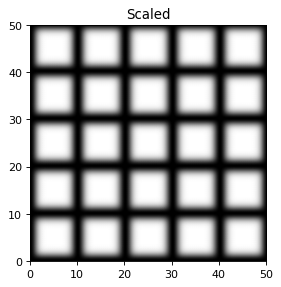

In [39]:
dimension=2
xScale=0.5
yScale=0.5

def affineScale(imOriginal, x_scale=xScale, y_scale=yScale):
    #new_transform = sitk.AffineTransform(transform) # <-- not sure what's the point of this line..
    #new_transform = transform
    new_transform = sitk.AffineTransform(dimension)
    matrix = np.array(new_transform.GetMatrix()).reshape((dimension,dimension))
    matrix[0,0] = x_scale
    matrix[1,1] = y_scale
    new_transform.SetMatrix(matrix.ravel())
    resampled = resample(imOriginal, new_transform)
    myshow(resampled, 'Scaled')
    print(matrix)
    return new_transform

#affine = sitk.AffineTransform(dimension)

imResized = affineScale(grid, xScale, yScale)

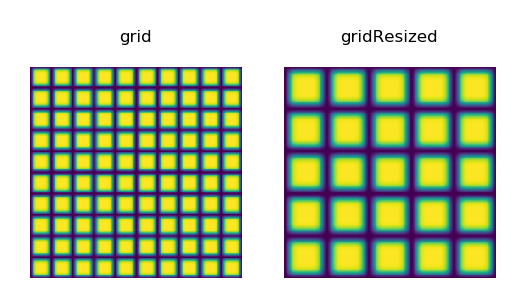

In [44]:
dimension=2
xScale=0.5
yScale=0.5

def affineScale(original, x_scale=xScale, y_scale=yScale):
    #new_transform = sitk.AffineTransform(transform) # <-- not sure what's the point of this line..
    #new_transform = transform
    new_transform = sitk.AffineTransform(dimension)
    matrix = np.array(new_transform.GetMatrix()).reshape((dimension,dimension))
    matrix[0,0] = x_scale
    matrix[1,1] = y_scale
    new_transform.SetMatrix(matrix.ravel())
    resampled = resample(original, new_transform)
    #myshow(resampled, 'Scaled')
    #print(matrix)
    #return new_transform
    return resampled

#affine = sitk.AffineTransform(dimension)

gridResized = affineScale(grid, xScale, yScale)


# Set the number of subplot columns:
cols=2
# Set the title font:
fontSize=4

plt.figure(figsize=(2, 2), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(sitk.GetArrayFromImage(grid));
plt.title('grid', size=fontSize);
plt.axis('off');

# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(sitk.GetArrayFromImage(gridResized));
plt.title('gridResized', size=fontSize);
plt.axis('off');

In [45]:
print('Parameter                  grid                                          gridResized')
print("\nImage PixelType            {0}                           {1}".format(sitk.GetPixelIDValueAsString(grid.GetPixelID()),\
                                                                              sitk.GetPixelIDValueAsString(gridResized.GetPixelID())))
print("Image PixelID              {0}                                               {1}".format(grid.GetPixelID(), gridResized.GetPixelID()))
print("Image Shape                {0}                                   {1}".format(grid.GetSize(), gridResized.GetSize()));
print("Image Origin               {0}                       {1}".format(grid.GetOrigin(), gridResized.GetOrigin()))
print("Image Spacing              {0}                       {1}".format(grid.GetSpacing(), gridResized.GetSpacing()))
print("Image Direction            {0}   {1}".format(grid.GetDirection(), gridResized.GetDirection()))

Parameter                  grid                                          gridResized

Image PixelType            16-bit unsigned integer                           16-bit unsigned integer
Image PixelID              3                                               3
Image Shape                (250, 250)                                   (250, 250)
Image Origin               (0.0, 0.0)                       (0.0, 0.0)
Image Spacing              (0.2, 0.2)                       (0.2, 0.2)
Image Direction            (1.0, 0.0, 0.0, 1.0)   (1.0, 0.0, 0.0, 1.0)


In [46]:
print('Parameter                  grid                                          image1')
print("\nImage PixelType            {0}                           {1}".format(sitk.GetPixelIDValueAsString(grid.GetPixelID()),\
                                                                              sitk.GetPixelIDValueAsString(image1.GetPixelID())))
print("Image PixelID              {0}                                               {1}".format(grid.GetPixelID(), image1.GetPixelID()))
print("Image Shape                {0}                                   {1}".format(grid.GetSize(), image1.GetSize()));
print("Image Origin               {0}                       {1}".format(grid.GetOrigin(), image1.GetOrigin()))
print("Image Spacing              {0}                       {1}".format(grid.GetSpacing(), image1.GetSpacing()))
print("Image Direction            {0}   {1}".format(grid.GetDirection(), image1.GetDirection()))

Parameter                  grid                                          image1

Image PixelType            16-bit unsigned integer                           32-bit signed integer
Image PixelID              3                                               4
Image Shape                (250, 250)                                   (512, 512, 1)
Image Origin               (0.0, 0.0)                       (-127.5, -127.5, -158.67)
Image Spacing              (0.2, 0.2)                       (0.498047, 0.498047, 1.0)
Image Direction            (1.0, 0.0, 0.0, 1.0)   (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [63]:
print(image1.GetSize())
image1new = np.squeeze(image1)
print(image1new.shape())

#print('Parameter                  image1                                          image1new')
#print("Image Shape                {0}                                   {1}".format(image1.GetSize(), image1new.shape()));
#print("Image Origin               {0}                       {1}".format(image1.GetOrigin(), image1new.GetOrigin()))
#print("Image Spacing              {0}                       {1}".format(image1.GetSpacing(), image1new.GetSpacing()))
#print("Image Direction            {0}   {1}".format(image1.GetDirection(), image1new.GetDirection()))

(512, 512, 1)


TypeError: 'tuple' object is not callable

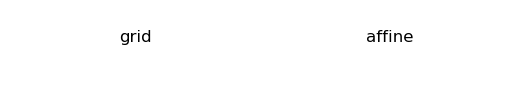

In [49]:
dimension=2
xScale=0.5
yScale=0.5

#image1Resized = affineScale(image1, xScale, yScale) # <-- sitk::ERROR: Unexpected error converting transform! 
# Possible miss matching dimensions!
image1Resized = affineScale(image1[0], xScale, yScale)


# Set the number of subplot columns:
cols=2
# Set the title font:
fontSize=4

plt.figure(figsize=(2, 2), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(sitk.GetArrayFromImage(image1[0]));
plt.title('grid', size=fontSize);
plt.axis('off');

# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(sitk.GetArrayFromImage(image1Resized));
plt.title('affine', size=fontSize);
plt.axis('off');

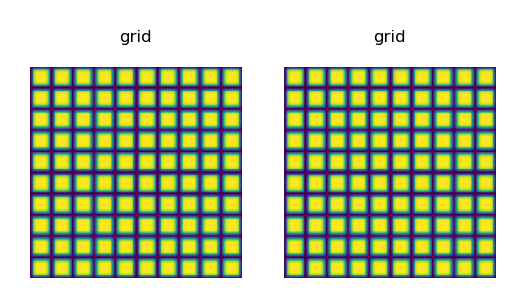

In [19]:
grid = sitk.GridSource(outputPixelType=sitk.sitkUInt16,
                       size=(250, 250),
                       sigma=(0.5, 0.5),
                       gridSpacing=(5.0, 5.0),
                       gridOffset=(0.0, 0.0),
                       spacing=(0.2, 0.2))

# Set the number of subplot columns:
cols=2
# Set the title font:
fontSize=4

plt.figure(figsize=(2, 2), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(sitk.GetArrayFromImage(grid));
plt.title('grid', size=fontSize);
plt.axis('off');

# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(sitk.GetArrayFromImage(grid));
plt.title('grid', size=fontSize);
plt.axis('off');

# Comment 10/01/2020:  I suspect the issue might be that image1 has shape (N,N,1) rather than (N,N).  I think I need to figure out why it's not 2D...

# But instead of proceeding with that, simplify the problem by selecting two images with equal resolutions

In [70]:
dicomDir = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff\data\dicom'

dicomFname1 = 'image-000115.dcm'
#dicomFname2 = 'image-000040.dcm'
dicomFname2 = 'image-000116.dcm'

dicomFpath1 = os.path.join(dicomDir, dicomFname1)
dicomFpath2 = os.path.join(dicomDir, dicomFname2)

image1 = sitk.ReadImage(dicomFpath1)
image2 = sitk.ReadImage(dicomFpath2)

# Convert from SimpleITK image data type to numpy data array:
image1nda = sitk.GetArrayFromImage(image1)
image2nda = sitk.GetArrayFromImage(image2)

#resultImage = sitk.Elastix(image1, image2, "translation")
#sitk.Show(image1, "Dicom Series")

print('Parameter                  image1                                          image2')
print("\nImage PixelType            {0}                           {1}".format(sitk.GetPixelIDValueAsString(image1.GetPixelID()),\
                                                                              sitk.GetPixelIDValueAsString(image2.GetPixelID())))
print("Image PixelID              {0}                                               {1}".format(image1.GetPixelID(), image2.GetPixelID()))
print("Image Shape                {0}                                   {1}".format(image1.GetSize(), image2.GetSize()));
print("Image Origin               {0}                       {1}".format(image1.GetOrigin(), image2.GetOrigin()))
print("Image Spacing              {0}                       {1}".format(image1.GetSpacing(), image2.GetSpacing()))
print("Image Direction            {0}   {1}".format(image1.GetDirection(), image2.GetDirection()))
print('Number of channels         {0}                                               {1}'.format(image1.GetNumberOfComponentsPerPixel(),\
                                                                                                image2.GetNumberOfComponentsPerPixel()))
print('Image Modality             {0}                                              {1}'.format(image1.GetMetaData('0008|0060'),\
                                                                                               image2.GetMetaData('0008|0060')))
print('Photometric interpretation {0}                                    {1}'.format(image1.GetMetaData('0028|0004'),\
                                                                                     image2.GetMetaData('0028|0004')))

Parameter                  image1                                          image2

Image PixelType            32-bit signed integer                           32-bit signed integer
Image PixelID              4                                               4
Image Shape                (512, 512, 1)                                   (512, 512, 1)
Image Origin               (-127.5, -127.5, -158.67)                       (-127.5, -127.5, -159.92)
Image Spacing              (0.498047, 0.498047, 1.0)                       (0.498047, 0.498047, 1.0)
Image Direction            (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)   (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Number of channels         1                                               1
Image Modality             CT                                              CT
Photometric interpretation MONOCHROME2                                     MONOCHROME2 


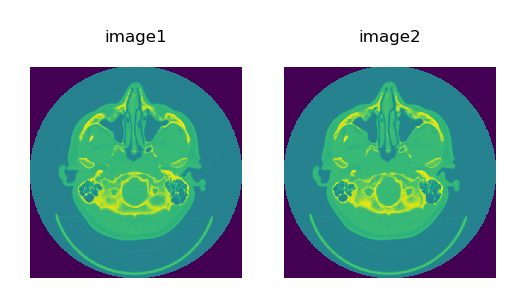

In [73]:
# Set the number of subplot columns:
cols=2
# Set the title font:
fontSize=4

plt.figure(figsize=(2, 2), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image1nda[0]);
plt.imshow(sitk.GetArrayFromImage(image1)[0]);
plt.title('image1', size=fontSize);
plt.axis('off');

# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
#plt.imshow(image2nda[0]);
plt.imshow(sitk.GetArrayFromImage(image2)[0]);
plt.title('image2', size=fontSize);
plt.axis('off');


# Try Rigid registration:

# https://simpleelastix.readthedocs.io/RigidRegistration.html

In [85]:
print('Parameter                  image1                                          image2')
print("Image Shape                {0}                                   {1}".format(image1.GetSize(), image2.GetSize()));

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(image1)
elastixImageFilter.SetMovingImage(image2)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("rigid"))
elastixImageFilter.LogToConsoleOn()
elastixImageFilter.LogToFileOn()
elastixImageFilter.Execute()
#sitk.WriteImage(elastixImageFilter.GetResultImage())

Parameter                  image1                                          image2
Image Shape                (512, 512, 1)                                   (512, 512, 1)


RuntimeError: Exception thrown in SimpleITK ElastixImageFilter_Execute: C:\SimpleElastix\source\SimpleElastix\Code\Elastix\src\sitkElastixImageFilterImpl.cxx:259:
sitk::ERROR: 
itk::ExceptionObject (0000008DA7BE7C30)
Location: "unknown" 
File: C:\SimpleElastix\build_20200108\Elastix\Core\Main\elxElastixFilter.hxx
Line: 253
Description: itk::ERROR: Self(000001A8A0C09070): Internal elastix error: See elastix log (use LogToConsoleOn() or LogToFileOn()).



# Try Affine registration:

# https://simpleelastix.readthedocs.io/AffineRegistration.html

In [77]:
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(image1)
elastixImageFilter.SetMovingImage(image2)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("affine"))
elastixImageFilter.Execute()
sitk.WriteImage(elastixImageFilter.GetResultImage())

RuntimeError: Exception thrown in SimpleITK ElastixImageFilter_Execute: C:\SimpleElastix\source\SimpleElastix\Code\Elastix\src\sitkElastixImageFilterImpl.cxx:259:
sitk::ERROR: 
itk::ExceptionObject (0000008DA7BE7C30)
Location: "unknown" 
File: C:\SimpleElastix\build_20200108\Elastix\Core\Main\elxElastixFilter.hxx
Line: 253
Description: itk::ERROR: Self(000001A89EEABDF0): Internal elastix error: See elastix log (use LogToConsoleOn() or LogToFileOn()).



# Try something else:

# https://github.com/SuperElastix/SimpleElastix/issues/132

In [74]:
result = sitk.Elastix(image1, image2)

RuntimeError: Exception thrown in SimpleITK Elastix: C:\SimpleElastix\source\SimpleElastix\Code\Elastix\src\sitkElastixImageFilterImpl.cxx:259:
sitk::ERROR: 
itk::ExceptionObject (0000008DA7BE7AA0)
Location: "unknown" 
File: C:\SimpleElastix\build_20200108\Elastix\Core\Main\elxElastixFilter.hxx
Line: 253
Description: itk::ERROR: Self(000001A8A1274570): Internal elastix error: See elastix log (use LogToConsoleOn() or LogToFileOn()).



In [75]:
result = sitk.Elastix(image1, image2, True)

RuntimeError: Exception thrown in SimpleITK Elastix: C:\SimpleElastix\source\SimpleElastix\Code\Elastix\src\sitkElastixImageFilterImpl.cxx:259:
sitk::ERROR: 
itk::ExceptionObject (0000008DA7BE7AA0)
Location: "unknown" 
File: C:\SimpleElastix\build_20200108\Elastix\Core\Main\elxElastixFilter.hxx
Line: 253
Description: itk::ERROR: Self(000001A89EEABF90): Internal elastix error: See elastix log (use LogToConsoleOn() or LogToFileOn()).

